In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
from IPython.display import display
from PIL import Image

In [2]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img3 = cv2.imread('3.jpg')

In [3]:
img1.shape

(626, 940, 3)

#### Code to Find the coordinates of the core of Cyclone by manually clicking on the image

In [4]:
def coords(img):
	def Capture_Event(event, x, y, flags, params):
		if event == cv2.EVENT_LBUTTONDOWN:
			print(f"({x}, {y})")

	if __name__=="__main__":
		cv2.imshow('img', img)
		cv2.setMouseCallback('img', Capture_Event)
		cv2.waitKey(0)

##### Image 1

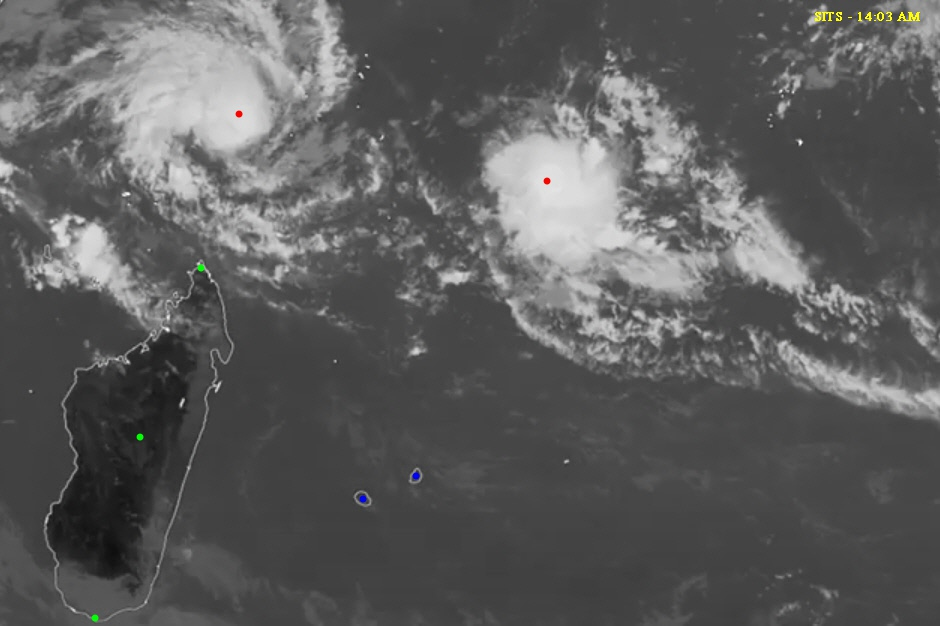

In [5]:
display(Image.open('1.jpg'))

In [6]:
coords(img1)

##### Coordinates of cyclones at time 14:03:
* Leftmost_Cyclone(x1,y1) = (238, 114)
* Rightmost_Cyclone(p1,q1) = (546, 181)

##### Image 2

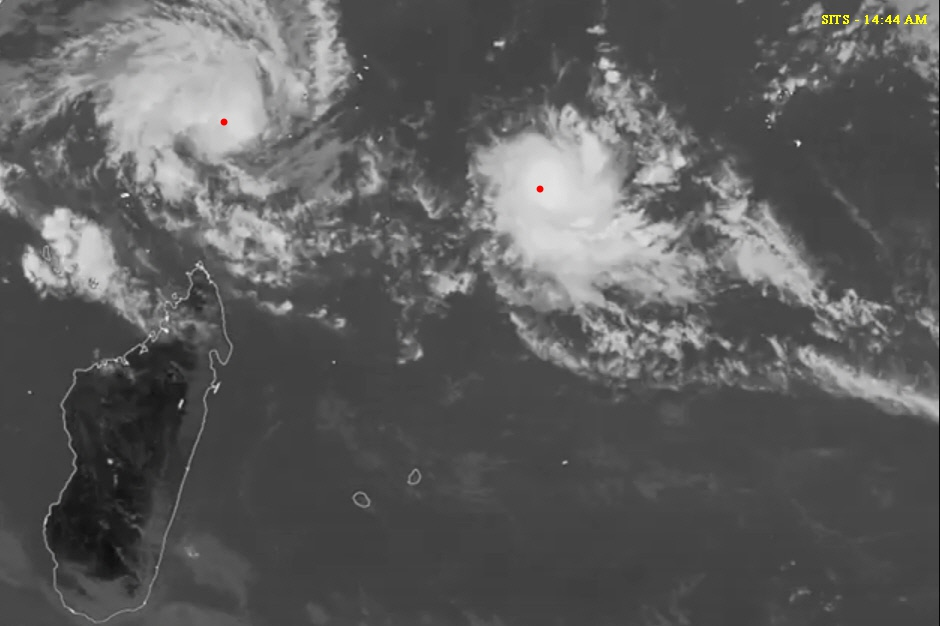

In [7]:
display(Image.open('2.jpg'))

In [8]:
coords(img2)

##### Coordinates of cyclones at time 14:44:
* Leftmost_Cyclone(x2,y2) = (223, 122)
* Rightmost_Cyclone(p2,q2) = (539, 189)

#### Image 3

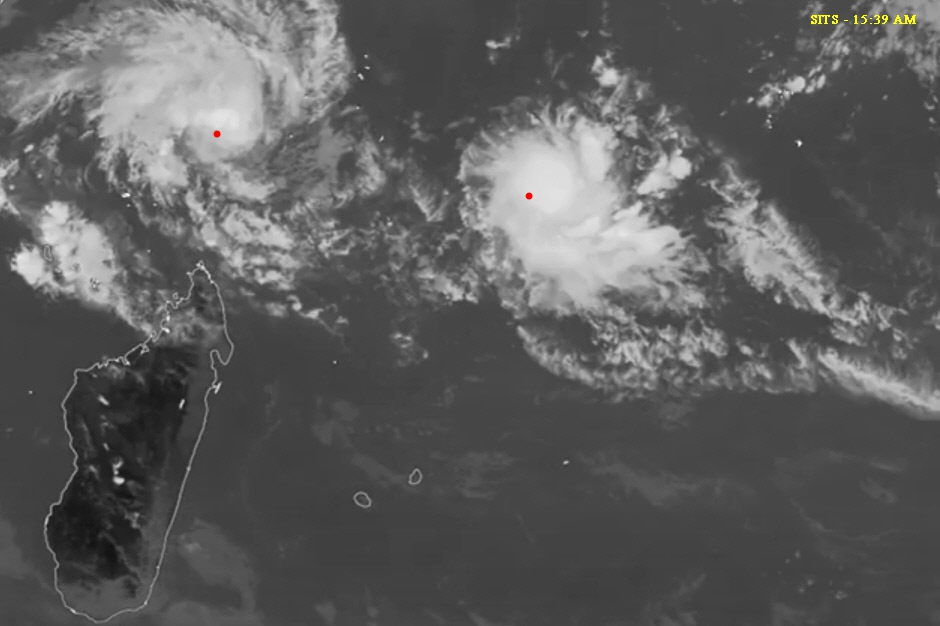

In [9]:
display(Image.open('3.jpg'))

In [10]:
coords(img3)

##### Coordinates of cyclones at time 15:39:
* Leftmost_Cyclone(x3,y3) = (217, 134)
* Rightmost_Cyclone(p3,q3) = (528, 196)

#### Combine 3 images to plot the trajectory

In [11]:
img = cv2.addWeighted(img3,0.5,img2,0.5,0)
img = cv2.addWeighted(img,0.5,img1,0.5,0)

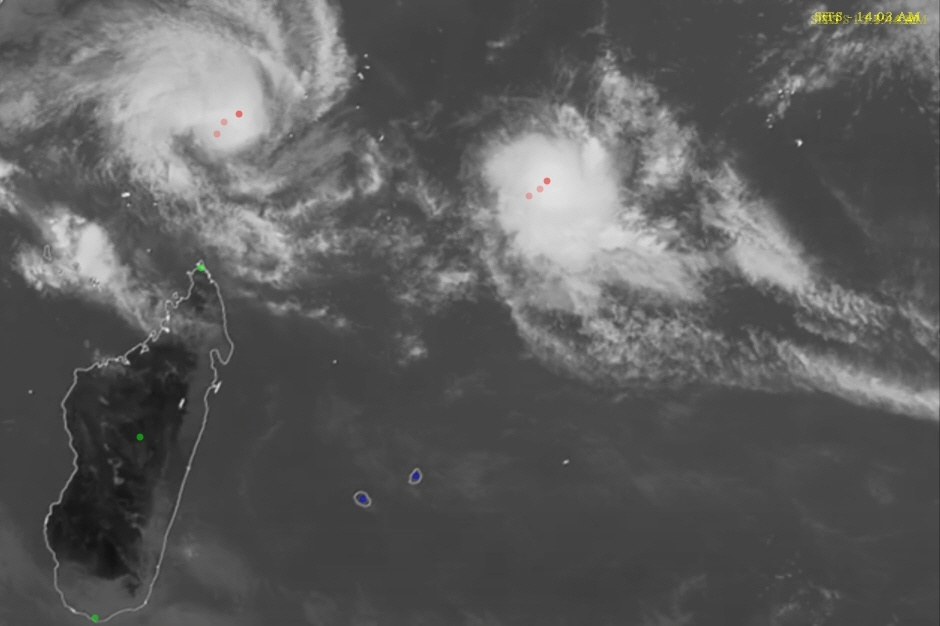

In [12]:
cv2.imwrite('comb.jpg',img)
display(Image.open('comb.jpg'))

#### Approximating the trajectory of cyclones using straight line passing through the core point of cyclone.

In [13]:
def drawLine(image,x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    h,w=image.shape[:2]
    px=0
    py=-(x1-0)*m+y1
    qx=w
    qy=-(x2-w)*m+y2
    cv2.line(image, (int(px), int(py)), (int(qx), int(qy)), (255, 255, 0), 2)


### To be precise, take the exact coordinates of cyclone tragectory

In [14]:
drawLine(img,223.5,121.5,216.5,133.5)
drawLine(img,539.5,188.5,528.5,195.5)

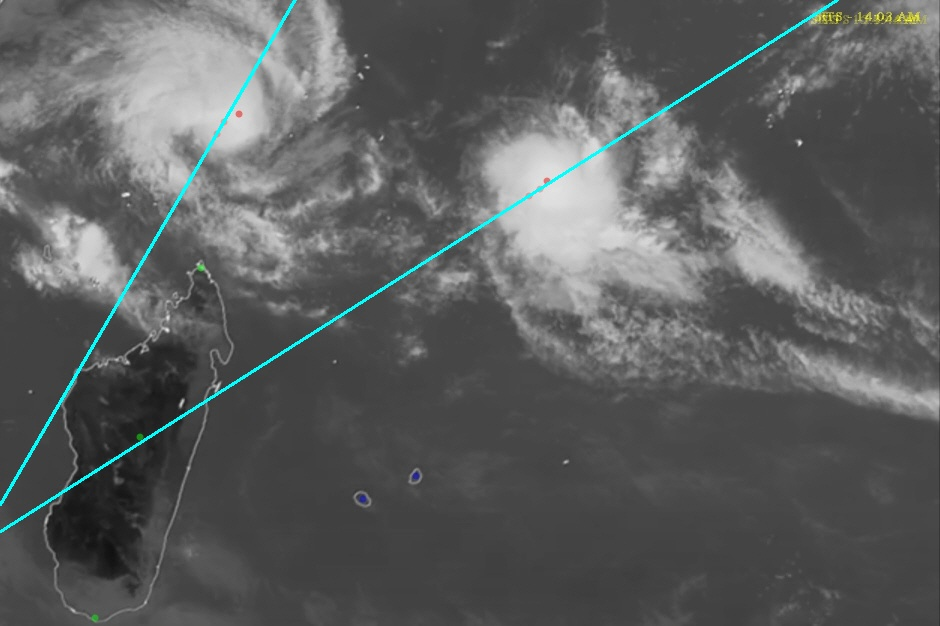

In [15]:
cv2.imwrite('line.jpg',img)
display(Image.open('line.jpg'))

In [16]:
coords(img1)

#### Coordinates of capital city:
* (c_x, c_y) = (139, 437)

#### Intersection point of cyclones by trajectory
* (-25.2, 547.8)

#### Converting distance between the pixels to distance

In [17]:
## Distance between the given cities north Antsiranana to south Benonoka
a = 1500/366.37   # Kilometers in one pixel
## Distance betweem the islands of Reunion and Mauritius
b = 250/57.27     # Kilometers in one pixel
print("Km per pixel= ", (a+b)/2)


Km per pixel=  4.2297544621785725


#### Distance between capital city and point of intersection
* 198.13 pixels = 198.13*4.23 = 838 km

## Taking average speed from point 1 to point 3
#### Speed of cyclone 1 = 0.31 pixel/min
#### Speed of cyclone 1 = 0.16 pixel/min

##### Distance between cyclone 1 and point of intersection from image 3 = 479 pixels
##### Distance between cyclone 2 and point of intersection from image 3 = 656 pixels

##### Time taken by cyclone 1 to reach intersection point
* 479/0.31 min = 25.75 hrs
##### Time taken by cyclone 2 to reach intersection point
* 656/0.16 min = 68.33 hrs

### Conclusion
Time difference is around 68.33 - 25.75 = 42.6hrs
* So there is barely any chance of collision

## Taking average speed from point 2 to point 3
#### Speed of cyclone 1 = 0.25 pixel/min
#### Speed of cyclone 1 = 0.24 pixel/min

##### Distance between cyclone 1 and point of intersection from image 3 = 479 pixels
##### Distance between cyclone 2 and point of intersection from image 3 = 656 pixels

##### Time taken by cyclone 1 to reach intersection point
* 479/0.25 min = 31.93 hrs
##### Time taken by cyclone 2 to reach intersection point
* 656/0.24 min = 45.56 hrs


### Conclusion
Time difference is around |31.93 - 45.56| = 13.63 hrs
* So there is barely any chance of collision